In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Bagian 1: Klasifikasi Biner (Memprediksi 'Survived')

In [17]:
# Load dataset
data_binary = pd.read_csv('titanic.csv')

# Preprocessing
data_binary = data_binary[['Sex', 'Age', 'Fare', 'Survived']].dropna()
data_binary['Sex'] = data_binary['Sex'].map({'male': 0, 'female': 1})

X_binary = data_binary[['Age', 'Fare']]
y_binary = data_binary['Survived']

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler_binary = StandardScaler()
X_train_bin = scaler_binary.fit_transform(X_train_bin)
X_test_bin = scaler_binary.transform(X_test_bin)

In [18]:
# 1.1 Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_bin, y_train_bin)
y_pred_linear_bin = linear_svm.predict(X_test_bin)

# Display evaluation metrics for Linear SVM
print("--- Evaluasi Model Biner: Linear SVM ---")
linear_acc_bin = accuracy_score(y_test_bin, y_pred_linear_bin)
print(f"Accuracy: {linear_acc_bin:.2f}")

--- Evaluasi Model Biner: Linear SVM ---
Accuracy: 0.66


In [19]:
# 1.2 Non-Linear SVM (RBF Kernel)
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train_bin, y_train_bin)
y_pred_nonlinear_bin = nonlinear_svm.predict(X_test_bin)
nonlinear_acc_bin = accuracy_score(y_test_bin, y_pred_nonlinear_bin)

# Display evaluation metrics for Non-Linear SVM
print("\n--- Evaluasi Model Biner: Non-Linear SVM (RBF) ---")
print(f"Accuracy: {nonlinear_acc_bin:.2f}")


--- Evaluasi Model Biner: Non-Linear SVM (RBF) ---
Accuracy: 0.66


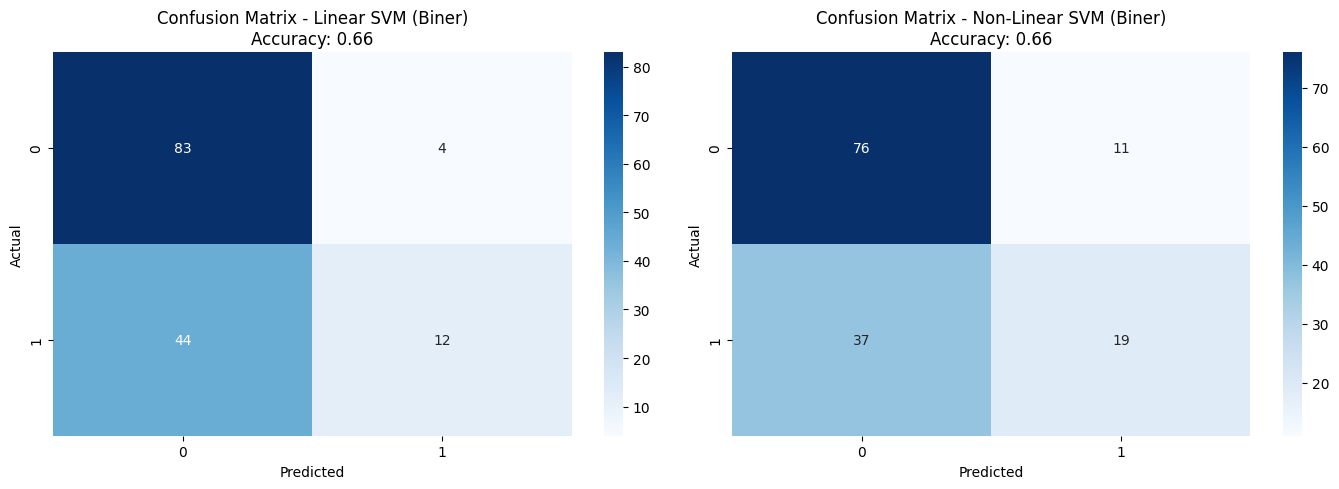

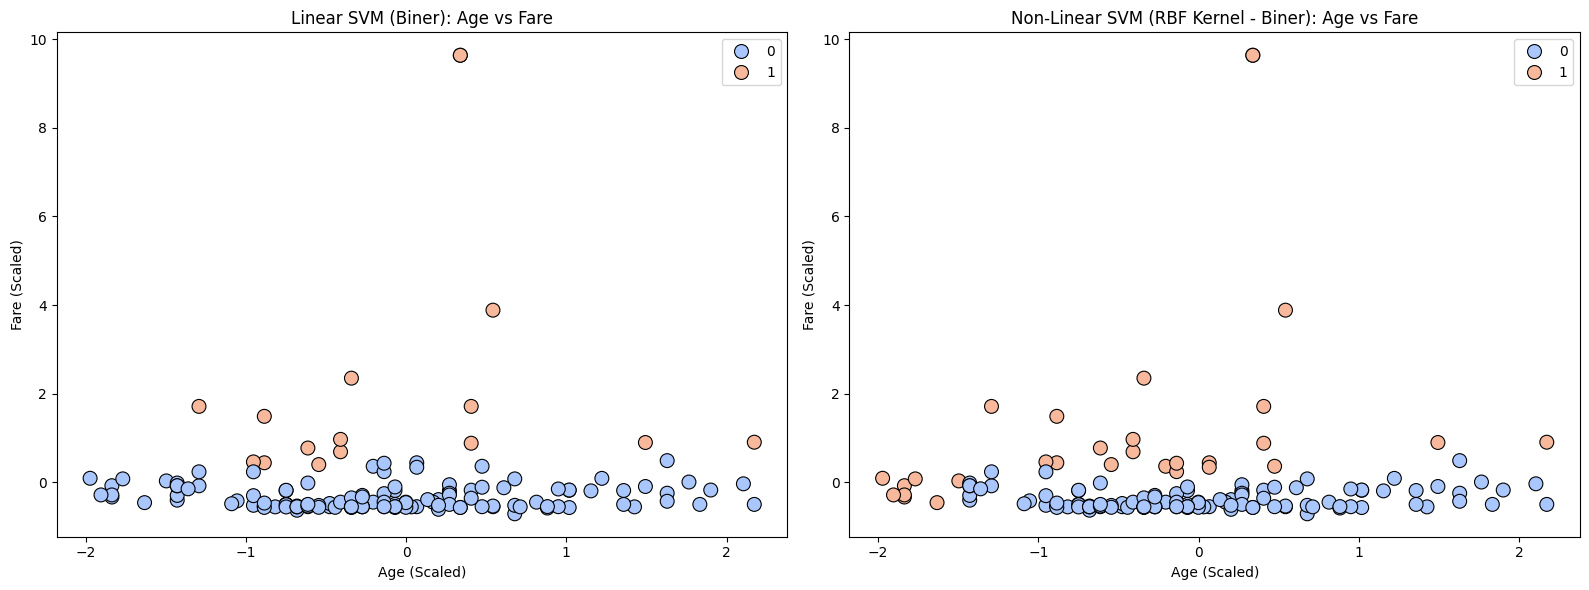

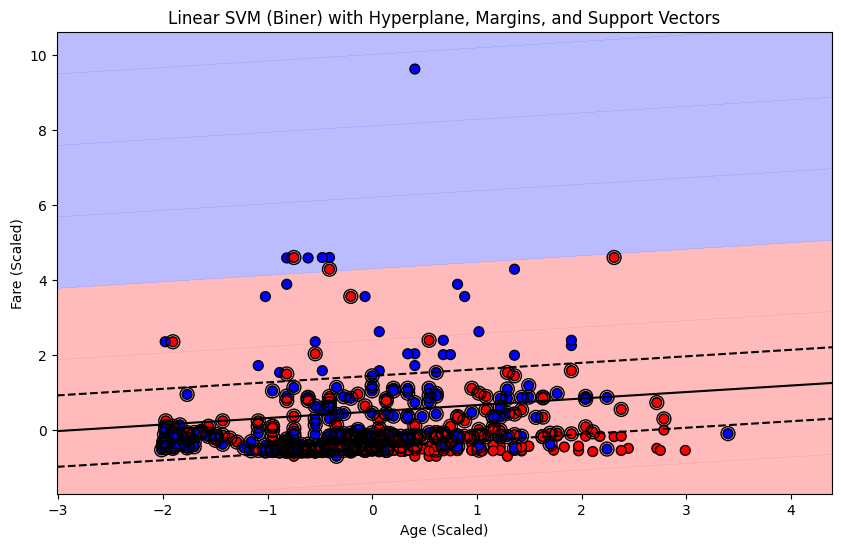

In [20]:
# 1. Plot Confusion Matrices (Linear vs Non-Linear)
cm_linear_bin = confusion_matrix(y_test_bin, y_pred_linear_bin)
cm_nonlinear_bin = confusion_matrix(y_test_bin, y_pred_nonlinear_bin)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_linear_bin, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Linear SVM (Biner)\nAccuracy: {linear_acc_bin:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_nonlinear_bin, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Non-Linear SVM (Biner)\nAccuracy: {nonlinear_acc_bin:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# 2. Plot Scatter (Perbandingan Prediksi)
# (Kode dari [Source: 33], diperbaiki error indeksnya dari X_test[:, 2] menjadi X_test_bin[:, 0])
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
# Koreksi: Menggunakan X_test_bin[:, 0] untuk 'Age' dan X_test_bin[:, 1] untuk 'Fare'
sns.scatterplot(x=X_test_bin[:, 0], y=X_test_bin[:, 1], hue=y_pred_linear_bin, palette='coolwarm', s=100, edgecolor='k')
plt.title('Linear SVM (Biner): Age vs Fare')
plt.xlabel('Age (Scaled)')
plt.ylabel('Fare (Scaled)')

plt.subplot(1, 2, 2)
# Koreksi: Menggunakan X_test_bin[:, 0] untuk 'Age' dan X_test_bin[:, 1] untuk 'Fare'
sns.scatterplot(x=X_test_bin[:, 0], y=X_test_bin[:, 1], hue=y_pred_nonlinear_bin, palette='coolwarm', s=100, edgecolor='k')
plt.title('Non-Linear SVM (RBF Kernel - Biner): Age vs Fare')
plt.xlabel('Age (Scaled)')
plt.ylabel('Fare (Scaled)')
plt.tight_layout()
plt.show()


# 3. Plot Hyperplane, Margins, dan Support Vectors (Hanya untuk Linear SVM)
# (Kode dari [Source: 36])
plt.figure(figsize=(10, 6))
X_train_data = X_train_bin
y_train_data = y_train_bin

# Define plot boundaries
x_min, x_max = X_train_data[:, 0].min() - 1, X_train_data[:, 0].max() + 1
y_min, y_max = X_train_data[:, 1].min() - 1, X_train_data[:, 1].max() + 1

# Create grid to evaluate model
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                   np.arange(y_min, y_max, 0.02))

# Predict class for each point in the grid
Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

# Plot support vectors
plt.scatter(X_train_data[:, 0], X_train_data[:, 1], c=y_train_data, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF']), s=50)
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1],
            facecolors='none', edgecolors='k', s=100, marker='o')

plt.title('Linear SVM (Biner) with Hyperplane, Margins, and Support Vectors')
plt.xlabel('Age (Scaled)')
plt.ylabel('Fare (Scaled)')
plt.show()

### Bagian 2: Klasifikasi Multi-Kelas (Memprediksi 'Pclass')

In [21]:
# Load dataset
data_multi = pd.read_csv('titanic.csv')

# Preprocessing
data_multi = data_multi[['Pclass', 'Age', 'Fare']].dropna()
X_multi = data_multi[['Age', 'Fare']]
y_multi = data_multi['Pclass']

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Standardize the features
scaler_multi = StandardScaler()
X_train_multi = scaler_multi.fit_transform(X_train_multi)
X_test_multi = scaler_multi.transform(X_test_multi)

In [22]:
# 2.1 Multi-Class SVM with Linear Kernel
linear_svm_multi = SVC(kernel='linear', decision_function_shape='ovr')
linear_svm_multi.fit(X_train_multi, y_train_multi)
y_pred_linear_multi = linear_svm_multi.predict(X_test_multi)

# Display evaluation metrics
print("\n--- Evaluasi Model Multi-Kelas: Linear SVM ---")
print(f"Accuracy: {accuracy_score(y_test_multi, y_pred_linear_multi):.2f}")

# 2.2 Multi-Class SVM with Non-Linear Kernel (RBF)
nonlinear_svm_multi = SVC(kernel='rbf', decision_function_shape='ovr')
nonlinear_svm_multi.fit(X_train_multi, y_train_multi)
y_pred_nonlinear_multi = nonlinear_svm_multi.predict(X_test_multi)

# Display evaluation metrics
print("\n--- Evaluasi Model Multi-Kelas: Non-Linear SVM (RBF) ---")
print(f"Accuracy: {accuracy_score(y_test_multi, y_pred_nonlinear_multi):.2f}")


--- Evaluasi Model Multi-Kelas: Linear SVM ---
Accuracy: 0.69

--- Evaluasi Model Multi-Kelas: Non-Linear SVM (RBF) ---
Accuracy: 0.72


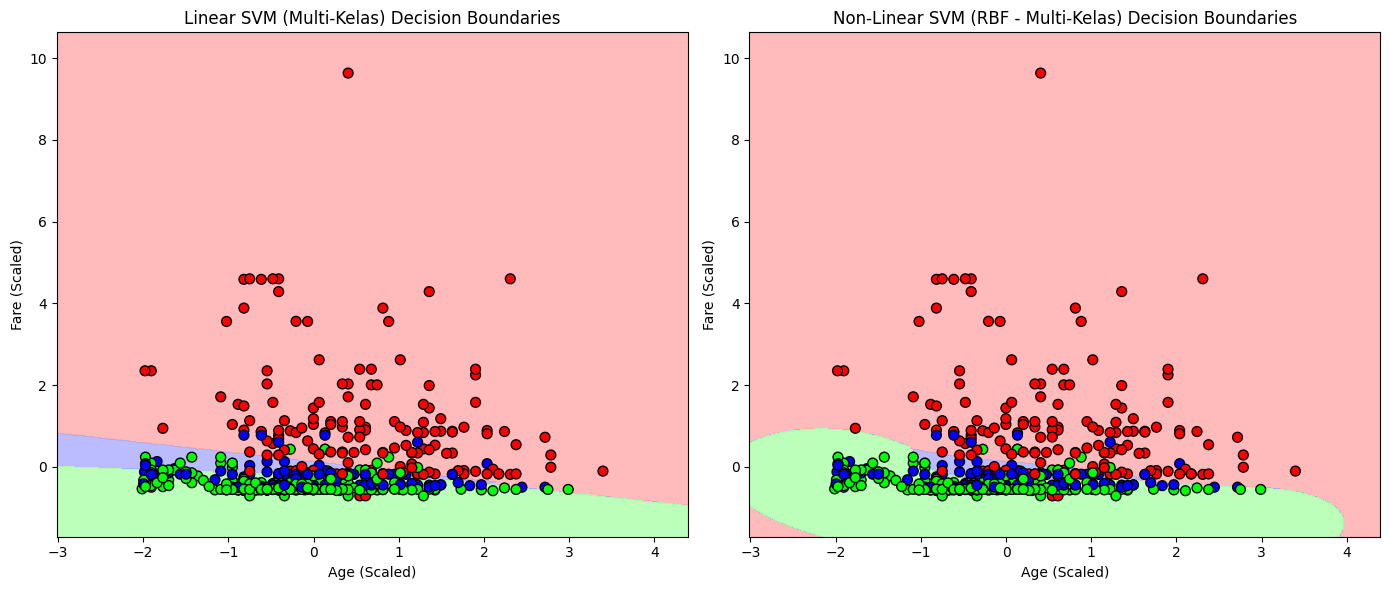

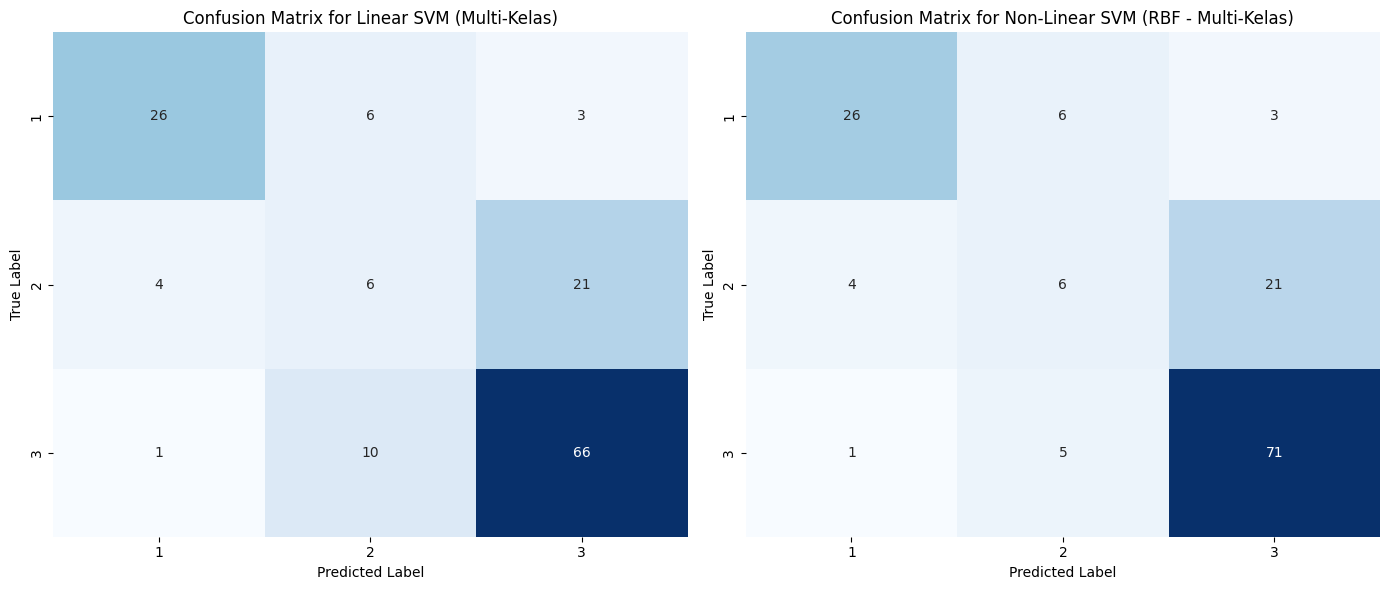

In [23]:
# 1. Plot Decision Boundaries (Multi-Kelas)
# (Kode dari [Source: 53])
X_train_data_multi = X_train_multi
y_train_data_multi = y_train_multi

# Define plot boundaries
x_min, x_max = X_train_data_multi[:, 0].min() - 1, X_train_data_multi[:, 0].max() + 1
y_min, y_max = X_train_data_multi[:, 1].min() - 1, X_train_data_multi[:, 1].max() + 1

# Create grid to evaluate model
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                   np.arange(y_min, y_max, 0.02))

# Plotting
plt.figure(figsize=(14, 6))

# Plotting Linear SVM
plt.subplot(1, 2, 1)
Z = linear_svm_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))
plt.scatter(X_train_data_multi[:, 0], X_train_data_multi[:, 1], c=y_train_data_multi, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00']), s=50)
plt.title('Linear SVM (Multi-Kelas) Decision Boundaries')
plt.xlabel('Age (Scaled)')
plt.ylabel('Fare (Scaled)')

# Plotting Non-Linear SVM (RBF Kernel)
plt.subplot(1, 2, 2)
Z = nonlinear_svm_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))
plt.scatter(X_train_data_multi[:, 0], X_train_data_multi[:, 1], c=y_train_data_multi, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00']), s=50)
plt.title('Non-Linear SVM (RBF - Multi-Kelas) Decision Boundaries')
plt.xlabel('Age (Scaled)')
plt.ylabel('Fare (Scaled)')

plt.tight_layout()
plt.show()


# 2. Plot Confusion Matrices (Multi-Kelas)
# (Kode dari [Source: 56])
cm_linear_multi = confusion_matrix(y_test_multi, y_pred_linear_multi)
cm_nonlinear_multi = confusion_matrix(y_test_multi, y_pred_nonlinear_multi)
class_labels = np.unique(y_multi)

plt.figure(figsize=(14, 6))

# Confusion Matrix for Linear SVM
plt.subplot(1, 2, 1)
sns.heatmap(cm_linear_multi, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Linear SVM (Multi-Kelas)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion Matrix for Non-Linear SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_nonlinear_multi, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Non-Linear SVM (RBF - Multi-Kelas)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()